In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [18]:
advr = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv")
advr = advr.drop('Unnamed: 0',axis=1)
advr

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [19]:
advr.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

No null values in the data set. 

<function matplotlib.pyplot.show(close=None, block=None)>

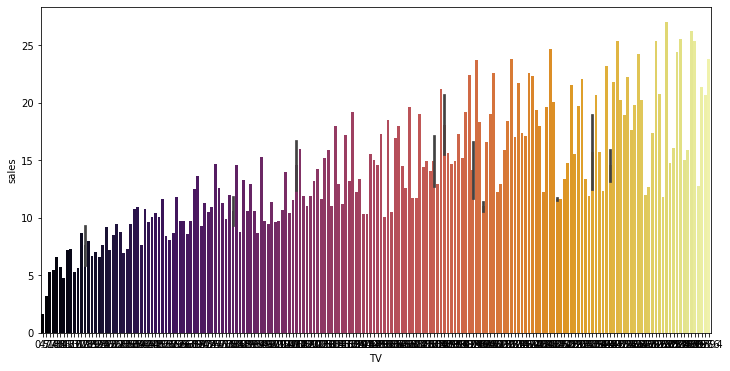

In [20]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'TV' , y= 'sales' , data = advr , palette='inferno')
plt.show

From the above graph we can check that the more advertisement on TV gives more results. 

<function matplotlib.pyplot.show(close=None, block=None)>

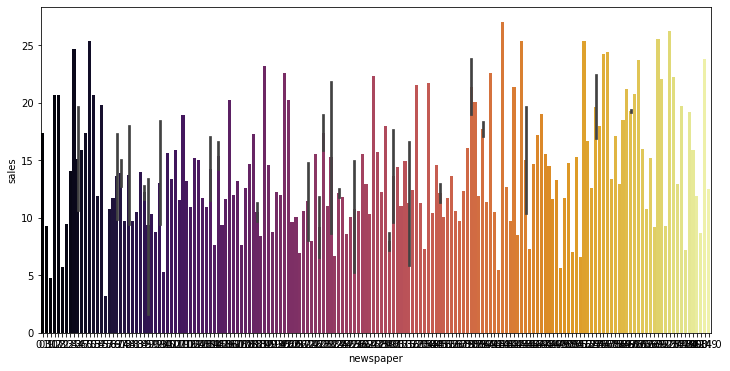

In [21]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'newspaper' , y= 'sales' , data = advr , palette='inferno')
plt.show

The graph reprsesents the relation between the ads in newspaper and sales. we can say that newspaper incresing the sales in an in order manner. 

<function matplotlib.pyplot.show(close=None, block=None)>

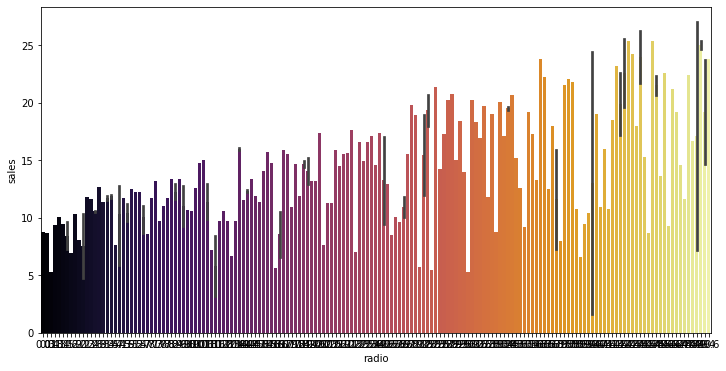

In [22]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'radio' , y= 'sales' , data = advr , palette='inferno')
plt.show

From the above graph we can say that more ads on radio gives higher sales. 

TV              AxesSubplot(0.125,0.71587;0.0945122x0.16413)
radio        AxesSubplot(0.238415,0.71587;0.0945122x0.16413)
newspaper    AxesSubplot(0.351829,0.71587;0.0945122x0.16413)
sales        AxesSubplot(0.465244,0.71587;0.0945122x0.16413)
dtype: object

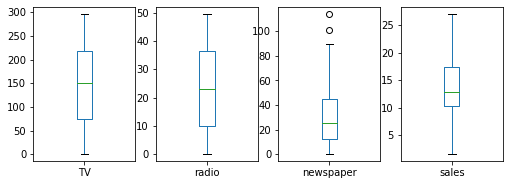

In [23]:
advr.plot(kind='box', subplots=True, layout=(4,7), figsize = (15,13))

From the above graph we can see that we have outliers in our data in newspaper columns. 

Will proceed further to remove the outiers. We can use:-
    
    1. Z-score
    2. IQR
    
 We will try the z-score first

In [24]:
from scipy.stats import zscore
z = np.abs(zscore(advr))
z.shape

(200, 4)

In [25]:
advr_new = advr[(z<3).all(axis=1)]
print(advr.shape)
print(advr_new.shape)

(200, 4)
(198, 4)


From the above 2 - steps we have identified the outliers and removed them. We can see that 2 rows have been removed from the dataset. We can check that bewlo by plotting the boxplot for the particular columns. 

newspaper    AxesSubplot(0.125,0.71587;0.0945122x0.16413)
dtype: object

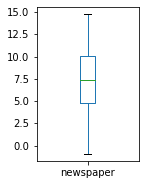

In [35]:
advr_new['newspaper'].plot(kind='box', subplots=True, layout=(4,7), figsize = (15,13))

In [26]:
data_loss = (200-198)/200*100
data_loss

1.0

We can check there is 1% loss of data, which is good to go. 

<function matplotlib.pyplot.show(close=None, block=None)>

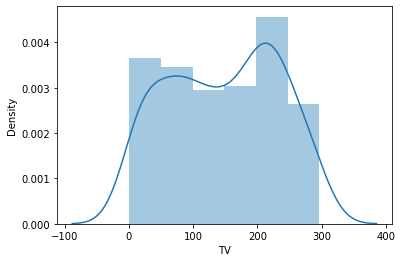

In [11]:
plt.figure()
sns.distplot(advr['TV'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

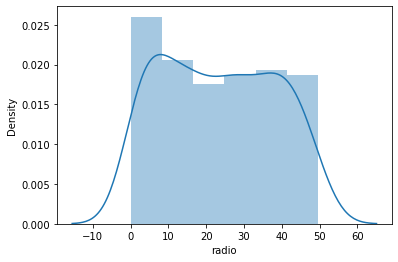

In [12]:
plt.figure()
sns.distplot(advr['radio'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

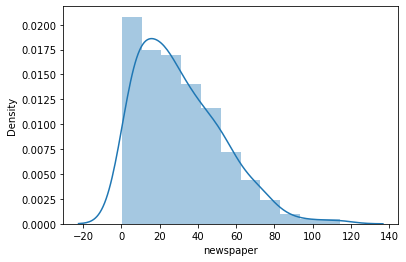

In [13]:
plt.figure()
sns.distplot(advr['newspaper'])
plt.show

From the above 3 graphs we can see that all the input variables have skewness in the data as the graph is slightly skewed and we aren't getting normalized curve for the same. 

In [29]:
print(advr_new.skew())
print("-------------------------")
print(advr.skew())

TV          -0.082332
radio        0.114842
newspaper    0.650112
sales        0.407130
dtype: float64
-------------------------
TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64


From the above details we can see that:

1. Newspaper is having skewness of 0.650112

As for us skeweness is accepted between -0.5 to 0.5, the above columns are highly skewed. so, let's try removing skewness from these columns using several methods we have:

1. Log Transform
2. Square Root Transform
3. Box-Cox Transform

Graph before removing skewness AxesSubplot(0.125,0.125;0.775x0.755)
value after removing the skewness -0.11731170877824974
New graph after removing the skewness:-


<AxesSubplot:xlabel='newspaper', ylabel='Density'>

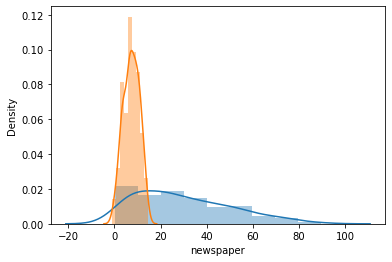

In [32]:
from scipy import stats
from scipy.stats import boxcox
print("Graph before removing skewness", sns.distplot(advr_new['newspaper']))

advr_new['newspaper'] = stats.boxcox(advr_new['newspaper'])[0]
    
print("value after removing the skewness", advr_new['newspaper'].skew())
print("New graph after removing the skewness:-")
sns.distplot(advr_new['newspaper'])

In [36]:
advr_new.skew()

TV          -0.082332
radio        0.114842
newspaper   -0.117312
sales        0.407130
dtype: float64

From the above 2 steps we have successfully removed the skewness from the column, which we can check graphically and numerically. 

In [37]:
advr_new.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.051978,0.037738,0.779121
radio,0.051978,1.000000,0.296175,0.576748
newspaper,0.037738,0.296175,1.000000,0.190624
sales,0.779121,0.576748,0.190624,1.000000


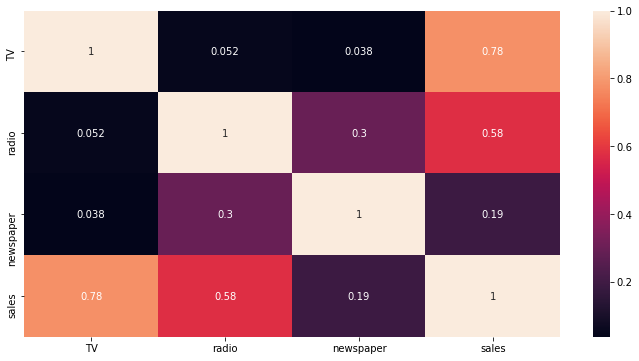

In [38]:
plt.figure(figsize=(12,6))
sns.heatmap(advr_new.corr(), annot = True)
plt.show()

From the above graph we can check that:-
   1.  TV is not very corelated with radio and newspaper but highly corelated with sales. 
   2.  Radio is not highly corelated wth TV but having a good corelation with newspaper and sales
   3.  Newspaper is not highly corelated wth TV but having a good corelation with radio and sales

We will proceed in building the model by splitting the dataset for training and testing purpose:-

In [39]:
advr_new.shape

(198, 4)

In [41]:
x = advr_new.iloc[:,0:3]
x

,TV,radio,newspaper
0,230.1,37.8,12.891654
1,44.5,39.3,10.223338
2,17.2,45.9,12.901562
3,151.5,41.3,11.782459
4,180.8,10.8,11.771592
...,...,...,...
195,38.2,3.7,5.052776
196,94.2,4.9,3.492980
197,177.0,9.3,2.914971
198,283.6,42.0,12.590719


In [44]:
y = advr_new['sales']
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 198, dtype: float64

We have successfully splitted the dataset in X and y, x contains all the independant variables and y have the label, independant variable

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform(x)

Scaling the data to remove imbalancing from the dataset as it effects our output

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

Importing the regression algorithms required for the model and in below columns we have given assigned them to a varialbe wjhich can be used further. 

In [60]:
dtc = DecisionTreeRegressor()
lr = LinearRegression()
svc = SVR()
rnd = RandomForestRegressor()

Fidning best random state for our model in the below columns. 

In [61]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = i)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1) == round(r2_score(y_test,pred_test)*100,1):
        print("AT random state",i,"the model performing good")

AT random state 214 the model performing good
AT random state 737 the model performing good
AT random state 835 the model performing good
AT random state 860 the model performing good


We have found the random state where our model is performing good

In [62]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = 214)
print(dtc.fit(x_train,y_train))
print(lr.fit(x_train,y_train))
print(svc.fit(x_train,y_train))
print(rnd.fit(x_train,y_train))

DecisionTreeRegressor()
LinearRegression()
SVR()
RandomForestRegressor()


We have fitted the train data to our model. 

In [64]:
pred_dtc = dtc.predict(x_test)
pred_lr = lr.predict(x_test)
pred_svc = svc.predict(x_test)
pred_rnd = rnd.predict(x_test)

We have predicted some result using the testing data(20%) that we have with us. 

In [66]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
print('Error Calculations: -')

print('Means absolute error', mean_absolute_error(y_test,pred_dtc))
print('Means Squared Error',mean_squared_error(y_test,pred_dtc))
print('Root mean square', np.sqrt(mean_squared_error(y_test,pred_dtc)))
print('Model Score',r2_score(y_test,pred_dtc))

Error Calculations: -
Means absolute error 0.6424999999999998
Means Squared Error 0.8447499999999997
Root mean square 0.9191028234098727
Model Score 0.9669367306600912


In [67]:
print('Error Calculations: -')

print('Means absolute error', mean_absolute_error(y_test,pred_lr))
print('Means Squared Error',mean_squared_error(y_test,pred_lr))
print('Root mean square', np.sqrt(mean_squared_error(y_test,pred_lr)))
print('Model Score',r2_score(y_test,pred_lr))

Error Calculations: -
Means absolute error 1.3272909397975607
Means Squared Error 2.6857491913277847
Root mean square 1.6388255524392414
Model Score 0.8948805576888869


In [73]:
print('Error Calculations: -')

print('Means absolute error', mean_absolute_error(y_test,pred_svc))
print('Means Squared Error',mean_squared_error(y_test,pred_svc))
print('Root mean square', np.sqrt(mean_squared_error(y_test,pred_svc)))
print('Model Score',r2_score(y_test,pred_svc))

Error Calculations: -
Means absolute error 1.476392386787556
Means Squared Error 3.8903541756185476
Root mean square 1.9723980773714387
Model Score 0.84773266891256


In [69]:
print('Error Calculations: -')

print('Means absolute error', mean_absolute_error(y_test,pred_rnd))
print('Means Squared Error',mean_squared_error(y_test,pred_rnd))
print('Root mean square', np.sqrt(mean_squared_error(y_test,pred_rnd)))
print('Model Score',r2_score(y_test,pred_rnd))

Error Calculations: -
Means absolute error 0.561550000000001
Means Squared Error 0.4559960499999999
Root mean square 0.6752747959164476
Model Score 0.9821524472103172


Above we calculated the mean absolute error, mean squarred error and squre root of the error, they represents the difference between the actual value and represents that there are some Fn and TN in the data. 

In [88]:
rnd.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

Performung hyper parameter tuning in order to find the best parameters for the machine learning model. 

In [102]:
from sklearn.model_selection import GridSearchCV
parameters = { 'n_estimators' :[100,200,300,400,500,600,700,800],
               'criterion'  :['squared_error','mse','absolute_error','poisson'],
               'max_depth' :[300,400,500,600,700,800],
               'min_samples_split' :[100,200,300,400,500]   
             }

grid_cv = GridSearchCV(estimator=rnd, param_grid = parameters)
grid_cv.fit(x_test, y_test)
best_para = grid_cv.best_params_
print(best_para)
best_result = grid_cv.best_score_
print(best_result)
print(round(best_result,2))

{'criterion': 'mse', 'max_depth': 600, 'min_samples_split': 100, 'n_estimators': 100}
-1.193120814614055
-1.19


Calculating the CV score for the algorithms. 

In [94]:
from sklearn.model_selection import cross_val_score
score_dtc=cross_val_score(dtc,x,y,cv=5)
print('\n')
print(score_dtc)
print(score_dtc.mean())
print(score_dtc.std())
print('------------------------')
score_lr=cross_val_score(lr,x,y,cv=5)
print(score_lr)
print(score_lr.mean())
print(score_lr.std())
print('------------------------')
score_svc=cross_val_score(svc,x,y,cv=5)
print(score_svc)
print(score_svc.mean())
print(score_svc.std())
print('------------------------')
score_rnd=cross_val_score(rnd,x,y,cv=5)
print(score_rnd)
print(score_rnd.mean())
print(score_rnd.std())
print('------------------------')



[0.96255921 0.94953801 0.95008088 0.93970045 0.97252434]
0.9548805797222528
0.011421736019152876
------------------------
[0.87926295 0.91751032 0.92571827 0.81091003 0.89557154]
0.8857946247264324
0.04085519832538995
------------------------
[0.85022282 0.87041722 0.83979407 0.8443175  0.78117476]
0.8371852733481528
0.029897131216764357
------------------------
[0.97876284 0.98606187 0.97826187 0.95917968 0.97889159]
0.9762315708819752
0.009000078921756485
------------------------


In [101]:
print('Model Score',r2_score(y_test,pred_dtc))
print('Mean Score After CV',score_dtc.mean())
print("Model Score is", r2_score(y_test,pred_dtc)-score_dtc.mean())
print('\n')      
      
print('Model Score',r2_score(y_test,pred_lr))
print('Mean Score After CV',score_lr.mean())
print("Model Score is", r2_score(y_test,pred_lr)-score_lr.mean())
print('\n')      
      
print('Model Score',r2_score(y_test,pred_svc))
print('Mean Score After CV',score_svc.mean())
print("Model Score is", r2_score(y_test,pred_svc)-score_svc.mean())
print('\n')      
      
print('Model Score',r2_score(y_test,pred_rnd))
print('Mean Score After CV',score_rnd.mean())
print("Model Score is", r2_score(y_test,pred_rnd)-score_rnd.mean())

Model Score 0.9669367306600912
Mean Score After CV 0.9548805797222528
Model Score is 0.012056150937838406


Model Score 0.8948805576888869
Mean Score After CV 0.8857946247264324
Model Score is 0.009085932962454413


Model Score 0.84773266891256
Mean Score After CV 0.8371852733481528
Model Score is 0.010547395564407203


Model Score 0.9821524472103172
Mean Score After CV 0.9762315708819752
Model Score is 0.00592087632834204


We have calculated the difference between the CV mean score and algo score, we can see that Random forest has the least difference hence we can say that Random forest is the best algorith for our model. 

Saving the model:

In [103]:
import pickle
filename = 'advertising_final_model.pkl'
pickle.dump(rnd, open(filename, 'wb'))